<h1>Franken-Code From Tutorials:</h1>
<p>This is from week 3. The goal was to create a working CNN.</p>

Found 24676 images belonging to 2 classes.
Found 20857 images belonging to 2 classes.
Epoch 1/20
2/2 [==============================] - 39s 19s/step - loss: 5.0999 - acc: 0.5156 - val_loss: 3.2474 - val_acc: 0.6562
Epoch 2/20
2/2 [==============================] - 31s 16s/step - loss: 6.2961 - acc: 0.6094 - val_loss: 4.2876 - val_acc: 0.5312
Epoch 3/20
2/2 [==============================] - 24s 12s/step - loss: 6.2961 - acc: 0.6094 - val_loss: 2.5348 - val_acc: 0.6250
Epoch 4/20
2/2 [==============================] - 23s 12s/step - loss: 8.0563 - acc: 0.5000 - val_loss: 3.6731 - val_acc: 0.5938
Epoch 5/20
2/2 [==============================] - 27s 13s/step - loss: 8.0590 - acc: 0.5000 - val_loss: 2.1530 - val_acc: 0.7500
Epoch 6/20
2/2 [==============================] - 25s 13s/step - loss: 8.5627 - acc: 0.4688 - val_loss: 1.8095 - val_acc: 0.7188
Epoch 7/20
2/2 [==============================] - 23s 12s/step - loss: 8.5627 - acc: 0.4688 - val_loss: 2.0159 - val_acc: 0.7500
Epoch 8/20


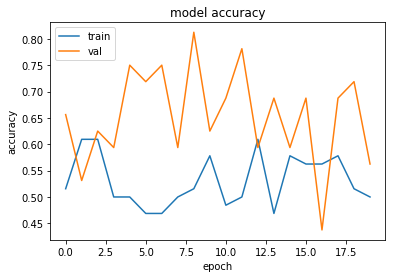

array([[1.78154111e-02],
       [4.19903100e-02],
       [3.05545330e-03],
       [1.38580799e-05],
       [2.78651714e-05],
       [1.50364637e-03],
       [1.11162663e-04],
       [3.93390656e-06],
       [1.92860663e-02],
       [5.27814031e-03],
       [2.50339508e-05],
       [4.67666984e-03],
       [3.26484442e-04],
       [2.79220939e-03],
       [1.26659870e-05],
       [0.00000000e+00],
       [5.96046448e-08],
       [2.10517645e-02],
       [1.65455341e-02],
       [3.17765176e-02],
       [1.98146701e-03],
       [1.03673041e-02],
       [3.15904617e-06],
       [6.28829002e-06],
       [3.02135944e-04],
       [1.31130219e-06],
       [4.29117680e-03],
       [1.85072422e-05],
       [1.78813934e-07],
       [0.00000000e+00],
       [3.03420424e-03],
       [4.55081463e-05],
       [8.39829445e-05],
       [5.95688820e-04],
       [8.04480910e-03],
       [1.38615370e-02],
       [8.35409760e-03],
       [3.89197469e-03],
       [7.00631738e-03],
       [0.00000000e+00],


In [10]:
'''This script is modified from the blog post
"Building powerful image classification models using very little data"
from blog.keras.io.
'''

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from matplotlib import pyplot as plt
import tensorflow as tf
import time

from tensorflow.keras.callbacks import TensorBoard

logs = TensorBoard(log_dir="/Users/lancastro/Desktop/Alice/cnn_data/logs")

# dimensions of our images.
img_width, img_height = 424, 424

nb_train_samples = 80 #800
nb_validation_samples = 32 #320
epochs = 20
batch_size = 32 #16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# this is the augmentation configuration we will use for training
# train_datagen = ImageDataGenerator(
#     horizontal_flip=True, 
#     vertical_flip=True, 
#     rotation_range=359, brightness_range=[0.4,1.0], 
#     zoom_range=[0.5, 0.5])

# this is the augmentation configuration we will use for testing:
# only rescaling
#test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    use_multiprocessing=True)

model.save_weights('attempt_1.h5')

# plots accuracy and validation
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# predicts the outcome
model.predict_generator(
                    validation_generator,  
                    steps=5,
                    use_multiprocessing=True)


<h1>Backup of the code above:</h1> 
<p> In case something goes horribly wrong with the code above and you need to start again. </p>

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K


# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = '/Users/lancastro/Desktop/Alice/cnn_data/train'
validation_data_dir = '/Users/lancastro/Desktop/Alice/cnn_data/validation'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.save_weights('first_try.h5')